In [915]:
import pandas as pd
import numpy as np

In [916]:
# Загружаем .csv файл в DataFrame:
df = pd.read_csv("../DBs/titanic.csv")#, usecols=["Survived", "Pclass", "Name", "Sex", "Age", "Fare"])
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Постановка задачи

Хотим научиться предсказывать, выживет ли поссажир, исходя из его признаков

<Axes: >

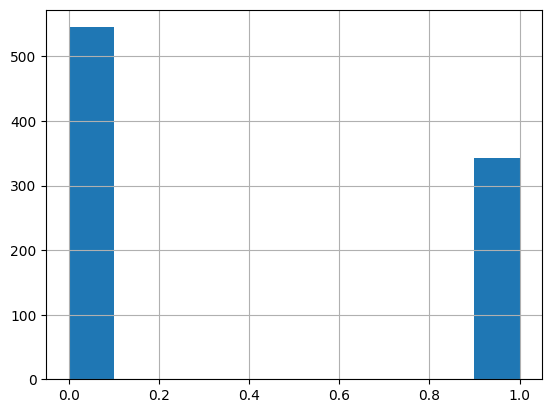

In [917]:
df["Survived"].hist(bins=10)

# Препроцессинг данных

Практически все модели работают только с числовыми признаками (фичами), поэтому все фичи необходимо перевести в int/float


In [918]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Sex

In [919]:
pd.get_dummies(df["Sex"], prefix="Sex").head()

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [920]:
# Нам достаточно только одной колонки для бинарной фичи (для N-нарной достаточно N-1 колонок)
pd.get_dummies(df["Sex"], prefix="Sex", drop_first=True).head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


In [921]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

In [922]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,True,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,False,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,True,35.0,0,0,8.0500


## Name

In [923]:
# посчитаем самое простое - длину имени
df["Name_len"] = df["Name"].str.len()

### Задание 6.1



(**1 - 3 балла**) Добавьте еще новых фичей (по 1 за каждый балл, но не больше 3), добавьте их к обучению модели

In [924]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
0,0,3,Mr. Owen Harris Braund,True,22.0,1,0,7.2500,22
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,1,0,71.2833,50
2,1,3,Miss. Laina Heikkinen,False,26.0,0,0,7.9250,21
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,1,0,53.1000,43
4,0,3,Mr. William Henry Allen,True,35.0,0,0,8.0500,23
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,0,0,13.0000,20
883,1,1,Miss. Margaret Edith Graham,False,19.0,0,0,30.0000,27
884,0,3,Miss. Catherine Helen Johnston,False,7.0,1,2,23.4500,30
885,1,1,Mr. Karl Howell Behr,True,26.0,0,0,30.0000,20


In [925]:
# Создание категорий семейного статуса
def categorize_family_status(family_size):
    if family_size == 0:
        return "Одинокий"
    elif family_size == 1:
        return "Пара"
    else:
        return "Семья"

# Рассчет общего количества родственников
df["Family_Size"] = df["Siblings/Spouses Aboard"] + df["Parents/Children Aboard"]

# Применение функции к датасету и создание нового столбца
df["Family_Status"] = df["Family_Size"].apply(categorize_family_status)
df = pd.get_dummies(df, columns=["Family_Status"], prefix="Family_Status")

df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len,Family_Size,Family_Status_Одинокий,Family_Status_Пара,Family_Status_Семья
0,0,3,Mr. Owen Harris Braund,True,22.0,1,0,7.2500,22,1,False,True,False
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,1,0,71.2833,50,1,False,True,False
2,1,3,Miss. Laina Heikkinen,False,26.0,0,0,7.9250,21,0,True,False,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,1,0,53.1000,43,1,False,True,False
4,0,3,Mr. William Henry Allen,True,35.0,0,0,8.0500,23,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,0,0,13.0000,20,0,True,False,False
883,1,1,Miss. Margaret Edith Graham,False,19.0,0,0,30.0000,27,0,True,False,False
884,0,3,Miss. Catherine Helen Johnston,False,7.0,1,2,23.4500,30,3,False,False,True
885,1,1,Mr. Karl Howell Behr,True,26.0,0,0,30.0000,20,0,True,False,False


In [926]:
# Создание категорий стоимости билета
def categorize_fare(fare):
    if fare < 30:
        return "Дешевые"
    elif 30 <= fare < 70:
        return "Средние"
    else:
        return "Дорогие"

# Применение функции к датасету и создание нового столбца
df["Fare_Category"] = df["Fare"].apply(categorize_fare)
df = pd.get_dummies(df, columns=["Fare_Category"], prefix="Fare_Category")

df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len,Family_Size,Family_Status_Одинокий,Family_Status_Пара,Family_Status_Семья,Fare_Category_Дешевые,Fare_Category_Дорогие,Fare_Category_Средние
0,0,3,Mr. Owen Harris Braund,True,22.0,1,0,7.2500,22,1,False,True,False,True,False,False
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,1,0,71.2833,50,1,False,True,False,False,True,False
2,1,3,Miss. Laina Heikkinen,False,26.0,0,0,7.9250,21,0,True,False,False,True,False,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,1,0,53.1000,43,1,False,True,False,False,False,True
4,0,3,Mr. William Henry Allen,True,35.0,0,0,8.0500,23,0,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,0,0,13.0000,20,0,True,False,False,True,False,False
883,1,1,Miss. Margaret Edith Graham,False,19.0,0,0,30.0000,27,0,True,False,False,False,False,True
884,0,3,Miss. Catherine Helen Johnston,False,7.0,1,2,23.4500,30,3,False,False,True,True,False,False
885,1,1,Mr. Karl Howell Behr,True,26.0,0,0,30.0000,20,0,True,False,False,False,False,True


In [927]:
df['Chinese_Zodiac'] = df['Age'].apply(lambda x: 'Крыса' if x % 12 == 0 else
                                        'Бык' if x % 12 == 1 else
                                        'Тигр' if x % 12 == 2 else
                                        'Кролик' if x % 12 == 3 else
                                        'Дракон' if x % 12 == 4 else
                                        'Змея' if x % 12 == 5 else
                                        'Лошадь' if x % 12 == 6 else
                                        'Овца' if x % 12 == 7 else
                                        'Обезьяна' if x % 12 == 8 else
                                        'Петух' if x % 12 == 9 else
                                        'Собака' if x % 12 == 10 else 'Свинья')

df = pd.get_dummies(df, columns=["Chinese_Zodiac"], prefix="Chinese_Zodiac")

df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len,Family_Size,...,Chinese_Zodiac_Змея,Chinese_Zodiac_Кролик,Chinese_Zodiac_Крыса,Chinese_Zodiac_Лошадь,Chinese_Zodiac_Обезьяна,Chinese_Zodiac_Овца,Chinese_Zodiac_Петух,Chinese_Zodiac_Свинья,Chinese_Zodiac_Собака,Chinese_Zodiac_Тигр
0,0,3,Mr. Owen Harris Braund,True,22.0,1,0,7.2500,22,1,...,False,False,False,False,False,False,False,False,True,False
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,1,0,71.2833,50,1,...,False,False,False,False,False,False,False,False,False,True
2,1,3,Miss. Laina Heikkinen,False,26.0,0,0,7.9250,21,0,...,False,False,False,False,False,False,False,False,False,True
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,1,0,53.1000,43,1,...,False,False,False,False,False,False,False,True,False,False
4,0,3,Mr. William Henry Allen,True,35.0,0,0,8.0500,23,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,0,0,13.0000,20,0,...,False,True,False,False,False,False,False,False,False,False
883,1,1,Miss. Margaret Edith Graham,False,19.0,0,0,30.0000,27,0,...,False,False,False,False,False,True,False,False,False,False
884,0,3,Miss. Catherine Helen Johnston,False,7.0,1,2,23.4500,30,3,...,False,False,False,False,False,True,False,False,False,False
885,1,1,Mr. Karl Howell Behr,True,26.0,0,0,30.0000,20,0,...,False,False,False,False,False,False,False,False,False,True


# Разбиваем данные на train и test

In [928]:
from sklearn.model_selection import train_test_split

In [929]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [930]:
len(df), len(df_train), len(df_test)

(887, 709, 178)

In [931]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len,Family_Size,...,Chinese_Zodiac_Змея,Chinese_Zodiac_Кролик,Chinese_Zodiac_Крыса,Chinese_Zodiac_Лошадь,Chinese_Zodiac_Обезьяна,Chinese_Zodiac_Овца,Chinese_Zodiac_Петух,Chinese_Zodiac_Свинья,Chinese_Zodiac_Собака,Chinese_Zodiac_Тигр
0,0,3,Mr. Owen Harris Braund,True,22.0,1,0,7.2500,22,1,...,False,False,False,False,False,False,False,False,True,False
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,False,38.0,1,0,71.2833,50,1,...,False,False,False,False,False,False,False,False,False,True
2,1,3,Miss. Laina Heikkinen,False,26.0,0,0,7.9250,21,0,...,False,False,False,False,False,False,False,False,False,True
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,False,35.0,1,0,53.1000,43,1,...,False,False,False,False,False,False,False,True,False,False
4,0,3,Mr. William Henry Allen,True,35.0,0,0,8.0500,23,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,True,27.0,0,0,13.0000,20,0,...,False,True,False,False,False,False,False,False,False,False
883,1,1,Miss. Margaret Edith Graham,False,19.0,0,0,30.0000,27,0,...,False,False,False,False,False,True,False,False,False,False
884,0,3,Miss. Catherine Helen Johnston,False,7.0,1,2,23.4500,30,3,...,False,False,False,False,False,True,False,False,False,False
885,1,1,Mr. Karl Howell Behr,True,26.0,0,0,30.0000,20,0,...,False,False,False,False,False,False,False,False,False,True


# Метрики

In [932]:
from numpy.typing import ArrayLike


def accuracy(y_true: ArrayLike, y_pred: ArrayLike) -> float:
  return sum(y_true == y_pred) / len(y_true)

### Задание 6.2

Реализуйте следующие метрики:
- (**1 балл**) Recall и Precision
- (**1 балл**) F1-score с вызовом Recall и Precision внутри (**+1 балл**, если вместо F1-score будет реализована общая метрика F-score, а по умолчанию использоваться beta=1)


In [933]:
def recall(y_true: ArrayLike, y_pred: ArrayLike) -> float:
    true_positives = sum((true == 1 and pred == 1) for true, pred in zip(y_true, y_pred))
    false_negatives = sum((true == 1 and pred == 0) for true, pred in zip(y_true, y_pred))
    
    if true_positives + false_negatives == 0:
        return 0.0
    return true_positives / (true_positives + false_negatives)

def precision(y_true: ArrayLike, y_pred: ArrayLike) -> float:
    true_positives = sum((true == 1 and pred == 1) for true, pred in zip(y_true, y_pred))
    false_positives = sum((true == 0 and pred == 1) for true, pred in zip(y_true, y_pred))
    
    if true_positives + false_positives == 0:
        return 0.0
    return true_positives / (true_positives + false_positives)

def f_score(y_true: ArrayLike, y_pred: ArrayLike, beta=1) -> float:
    r = recall(y_true, y_pred)
    p = precision(y_true, y_pred)
    
    if r + p == 0:
        return 0.0
    
    return (1 + beta**2) * (p * r) / ((beta**2 * p) + r)


# Обучаем модель

In [934]:
# выбираем колонки, которые будем использовать в качестве фичей и таргета
features = ["Pclass", "Sex", "Age", "Parents/Children Aboard",
            "Family_Status_Одинокий", "Family_Status_Пара","Family_Status_Семья",
            "Fare_Category_Дешевые", "Fare_Category_Средние", "Fare_Category_Дорогие",
            "Chinese_Zodiac_Крыса"]
target = "Survived"

In [935]:
from sklearn.linear_model import LogisticRegression
# объявляем модель (можно менять параметры, читайте доку)
model = LogisticRegression(random_state=42)


In [936]:
# обучаем модель
model.fit(X=df_train[features], y=df_train[target])

e:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [937]:
# делаем предсказания
df_train["predict"] = model.predict(df_train[features])
df_test["predict"] = model.predict(df_test[features])

## Считаем метрики

In [938]:
# train set
acc = accuracy(y_true=df_train["Survived"], y_pred=df_train["predict"])
rec = recall(y_true=df_train["Survived"], y_pred=df_train["predict"])
prec = precision(y_true=df_train["Survived"], y_pred=df_train["predict"])
f1 = f_score(y_true=df_train["Survived"], y_pred=df_train["predict"])

acc, rec, prec, f1

(0.8166431593794076,
 0.7418181818181818,
 0.7756653992395437,
 0.7583643122676581)

In [939]:
# test set
acc = accuracy(y_true=df_test["Survived"], y_pred=df_test["predict"])
rec = recall(y_true=df_test["Survived"], y_pred=df_test["predict"])
prec = precision(y_true=df_test["Survived"], y_pred=df_test["predict"])
f1 = f_score(y_true=df_test["Survived"], y_pred=df_test["predict"])

acc, rec, prec, f1

(0.7584269662921348, 0.5522388059701493, 0.74, 0.6324786324786325)

### Задание 6.3

(**3 балла**) Получите значение accuracy выше, чем текущее на этом же test-сете. Для этого можете добавлять новые фичи, удалять старые, менять параметры модели и т.д., но не перемешивайте данные

## Влияние фичей

Для небольших моделей с малым количеством весов (линейные модели, логистическая регрессия) можно смотреть на вес при каждом признаке<br>Чем вес по модулю больше - тем важнее фича, а знак отвечает за то, в положительную или отрицательную сторону признак двигает таргет

In [940]:
from typing import Any
from matplotlib import pyplot as plt


# подходит для некоторых функций из sklearn-а, если хотите использовать другие модели - нужно написать кастомную функцию
def plot_feat_importance(model: Any, abs_coefs: bool = True):
  coefficients = model.coef_
  importance = np.abs(model.coef_)[0] if abs_coefs else model.coef_[0]
  feature_importance = pd.DataFrame({'feature': features, 'importance': importance, 'abs_importance': np.abs(importance)})
  feature_importance = feature_importance.sort_values('abs_importance', ascending=True)
  feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(7, 4))
  plt.show()


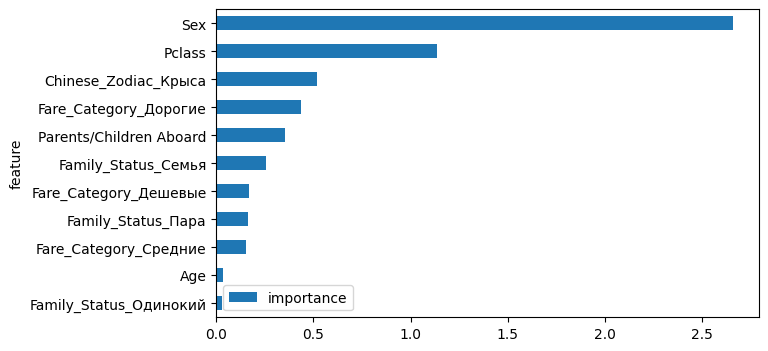

In [941]:
# в абсолютах
plot_feat_importance(model=model, abs_coefs=True)

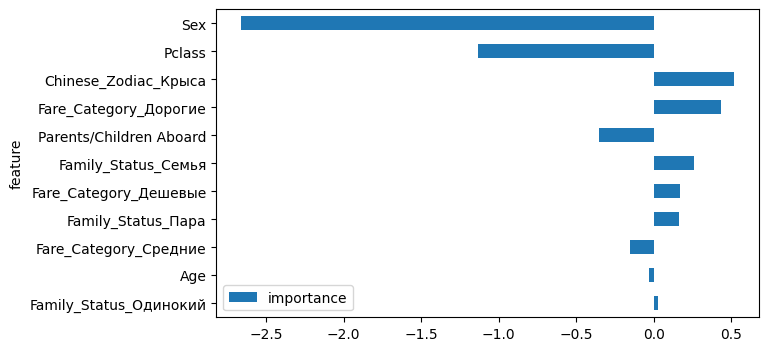

In [942]:
# не в абсолютах
plot_feat_importance(model=model, abs_coefs=False)

In [943]:
df_train.groupby(["Sex"])["Survived"].mean()

Sex
False    0.750958
True     0.176339
Name: Survived, dtype: float64

In [944]:
df_train.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.641176
2    0.489655
3    0.241117
Name: Survived, dtype: float64

### Задание 6.4

(**до 5 баллов**) Найдите (или соберите) новый датасет, в котором решаемую задачу можно свести к отличной от бинарной классификации. И проделайте все те же самые действия, а именно:
- Изучите данные
- Сформулируйте задачу
- Обработайте данные и проведите feature-engineering
- Разбейте данные на train и test
- Подберите и реализуйте метрики
- Подберите и обучите модель
- Замерьте качество получившейся модели
- Посмотрите на влияние отдельных признаков (если используете более сложные моделе, то можете использовать библиотеку [SHAP](https://shap.readthedocs.io/en/latest/))

In [945]:
marvel = pd.read_csv("../DBs/marvel.csv")
marvel.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


**Задача**

Научиться предсказывать жив ли герой исходя из его признаков

<Axes: >

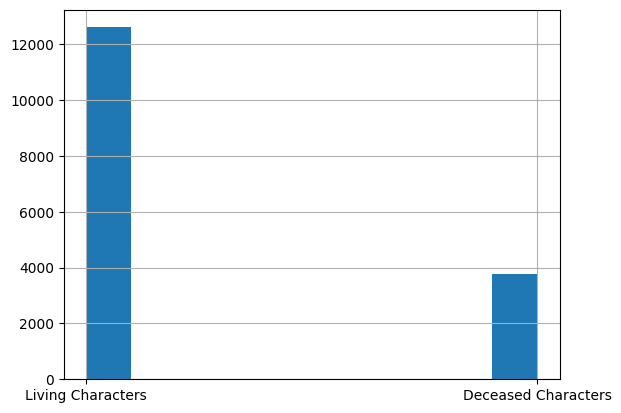

In [946]:
marvel["ALIVE"].hist(bins=10)

In [947]:
marvel["Is_Alive"] = (marvel["ALIVE"] == "Living Characters").astype(int)
marvel

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Is_Alive
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,1
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,1
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,1
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,1
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1
16372,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1
16373,Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1
16374,TK421 (Spiderling) (Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1


In [948]:
marvel["Is_Secretive"] = (marvel["ID"] == "Secret Identity").astype(int)
marvel = pd.get_dummies(marvel, columns=["ALIGN"], prefix="ALIGN")

columns_to_check = ["Is_Secretive", "ALIGN_Bad Characters", "ALIGN_Good Characters", "ALIGN_Neutral Characters", "Is_Alive"]
marvel.dropna(subset=columns_to_check, inplace=True)

marvel

,name,ID,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Is_Alive,Is_Secretive,ALIGN_Bad Characters,ALIGN_Good Characters,ALIGN_Neutral Characters
0,Spider-Man (Peter Parker),Secret Identity,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,1,1,False,True,False
1,Captain America (Steven Rogers),Public Identity,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,1,0,False,True,False
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,1,0,False,False,True
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,1,0,False,True,False
4,Thor (Thor Odinson),No Dual Identity,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,1,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,Ru'ach (Earth-616),No Dual Identity,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1,0,True,False,False
16372,Thane (Thanos' son) (Earth-616),No Dual Identity,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1,0,False,True,False
16373,Tinkerer (Skrull) (Earth-616),Secret Identity,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1,1,True,False,False
16374,TK421 (Spiderling) (Earth-616),Secret Identity,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,1,1,False,False,True


In [949]:
marvel_train, marvel_test = train_test_split(marvel, test_size=0.2, random_state=42)
len(marvel), len(marvel_train), len(marvel_test)

(16376, 13100, 3276)

In [950]:
features = [
    "Is_Secretive", "ALIGN_Bad Characters", "ALIGN_Good Characters", "ALIGN_Neutral Characters"
]
target = "Is_Alive"

In [951]:
m_model = LogisticRegression(random_state=42)
m_model.fit(X=marvel_train[features], y=marvel_train[target])

LogisticRegression(random_state=42)

In [952]:
marvel_train["predict"] = m_model.predict(marvel_train[features])
marvel_test["predict"] = m_model.predict(marvel_test[features])

In [953]:
# train set
acc = accuracy(y_true=marvel_train["Is_Alive"], y_pred=marvel_train["predict"])
rec = recall(y_true=marvel_train["Is_Alive"], y_pred=marvel_train["predict"])
prec = precision(y_true=marvel_train["Is_Alive"], y_pred=marvel_train["predict"])
f1 = f_score(y_true=marvel_train["Is_Alive"], y_pred=marvel_train["predict"])

acc, rec, prec, f1

(0.7715267175572519, 1.0, 0.7715267175572519, 0.871030292584134)

In [954]:
# test set
acc = accuracy(y_true=marvel_test["Is_Alive"], y_pred=marvel_test["predict"])
rec = recall(y_true=marvel_test["Is_Alive"], y_pred=marvel_test["predict"])
prec = precision(y_true=marvel_test["Is_Alive"], y_pred=marvel_test["predict"])
f1 = f_score(y_true=marvel_test["Is_Alive"], y_pred=marvel_test["predict"])

acc, rec, prec, f1

(0.7634310134310134, 1.0, 0.7634310134310134, 0.8658473256015232)

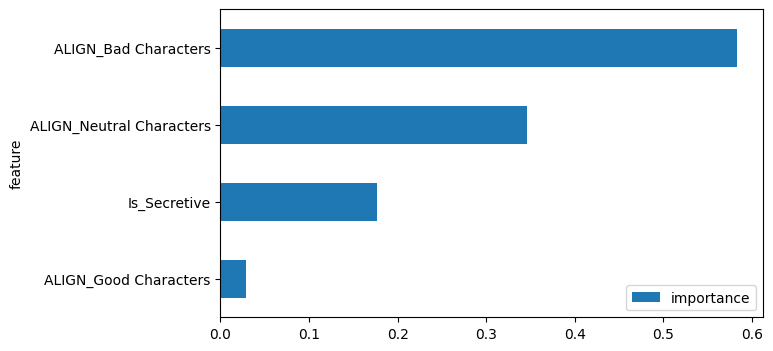

In [955]:
plot_feat_importance(model=m_model, abs_coefs=True)

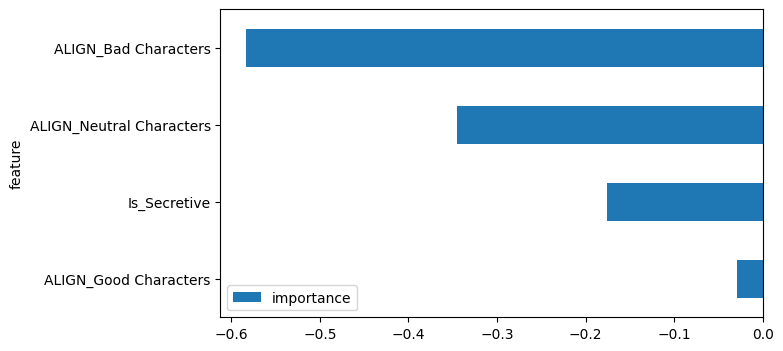

In [956]:
plot_feat_importance(model=m_model, abs_coefs=False)

Вывод: плохие персонажи умирают чаще